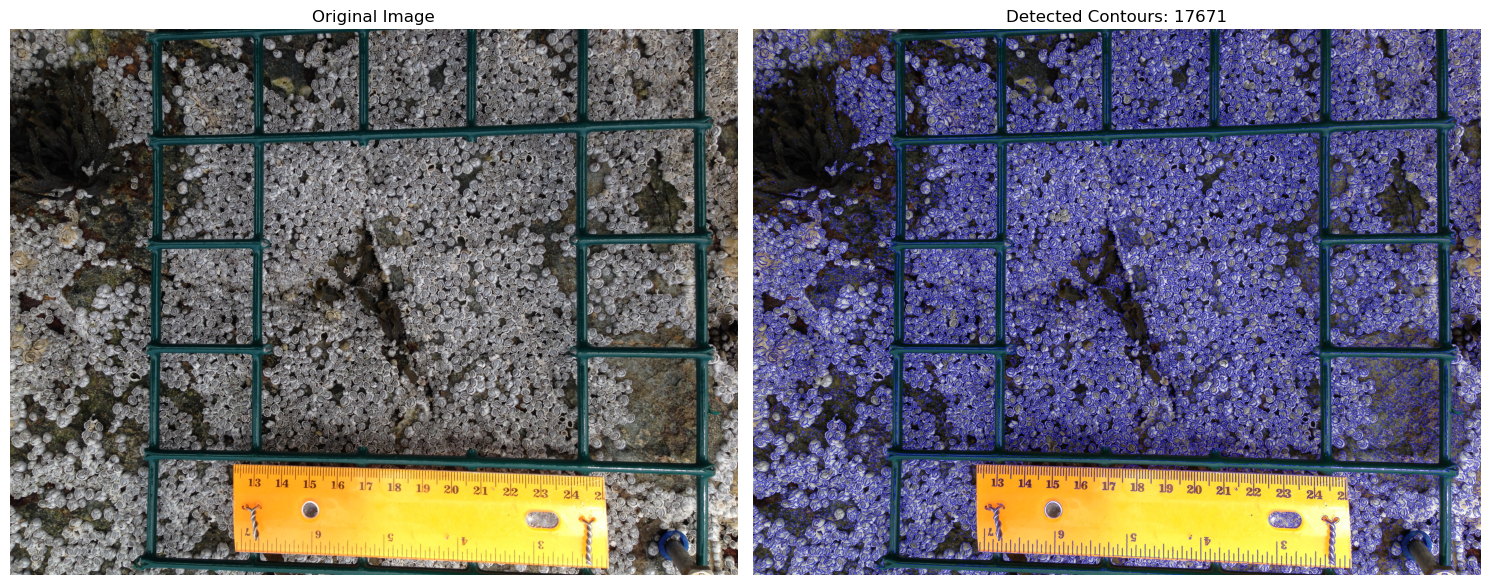

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread("img1.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #since we are only interested in structural features

#using a 5 by 5 gaussian filter to reduce noise (each pixel is replaced by a weighted average of its neighbours)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)


edges = cv2.Canny(blurred, threshold1=50, threshold2=150)#canny edge detection which depends on the intensity gradient of an image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #finding contours of constant intensity/color

output_image = image.copy()
cv2.drawContours(output_image, contours, -1, (255, 0, 0), 1) #highlighting the contours

fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
ax[1].set_title(f"Detected Contours: {len(contours)}")
ax[1].axis("off")

plt.tight_layout()
plt.show()